<a href="https://colab.research.google.com/github/Folia412/Web-2024/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
import re
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [424]:
df = pd.read_csv("visitor-interests.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19926 entries, 0 to 19925
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IP         19926 non-null  object
 1   UserAgent  19926 non-null  object
 2   Country    16721 non-null  object
 3   Languages  19926 non-null  object
 4   Interests  19919 non-null  object
dtypes: object(5)
memory usage: 778.5+ KB


In [425]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
for i in range (len(df)):
  text = df.at[i,'Languages']
  text = text.lower()
  text = re.sub("@\S+", " ", text)
  text = re.sub("https*\S+", " ", text)
  text = re.sub("#\S+", " ", text)
  text = re.sub("\d", " ", text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  text = re.sub('\n', ' ', text)
  text = re.sub(' \w ', ' ', text)
  text = re.sub(' \w{2} ', ' ', text)
  text = re.sub('\s{2,}',' ', text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  df.at[i,'Languages'] = text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [426]:
df.size

99630

In [427]:
df.dropna(inplace=True)
df.size

83580

In [428]:
df.head()

,IP,UserAgent,Country,Languages,Interests
0,1.10.195.126,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,TH,english,other
1,1.1.217.211,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,TH,thai,blog/personal homepage
2,1.115.198.107,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,JP,english,shop/online shopping website
3,1.121.152.143,Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...,AU,english,company
4,1.123.135.213,Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...,AU,english,company


In [430]:
df.groupby('Languages')['IP'].nunique()

Languages
afrikaans               6
albanian               15
amharic                 1
arabic                 39
armenian                8
                     ... 
urdu                    9
urdu english            1
vietnamese            141
vietnamese english      4
welsh english           2
Name: IP, Length: 143, dtype: int64

In [431]:
df.loc[df['Country']=='UA']

,IP,UserAgent,Country,Languages,Interests
1565,31.128.95.217,Mozilla/5.0 (Linux; Android 4.2.1; PX1 Build/P...,UA,russian,automobile sites
1566,31.129.115.97,Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebK...,UA,ukrainian,torrent
1567,31.129.162.54,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,UA,english,company/other
1568,31.129.67.182,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,UA,russian,искусство и развлечения/фотография
1574,31.134.124.243,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,UA,russian,retail
...,...,...,...,...,...
19636,217.76.205.34,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,UA,russian,health/beauty
19637,217.77.212.152,Mozilla/5.0 (Linux; Android 4.4.2; Lenovo B600...,UA,russian,video/music
19638,217.77.215.245,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:48.0) G...,UA,english,retail
19639,217.77.220.129,Mozilla/5.0 (X11; Linux i686) AppleWebKit/537....,UA,russian,прокси-серверы/интернет/компьютеры


In [432]:
df.loc[df['Interests']=='education']

,IP,UserAgent,Country,Languages,Interests
374,5.1.31.24,Mozilla/5.0 (Linux; Android 4.4.2; Lenovo A319...,EU,ukrainian,education
463,5.19.1.179,Mozilla/5.0 (Linux; Android 6.0; LG-H422 Build...,EU,russian,education
1571,31.13.144.23,Mozilla/5.0 (Linux; Android 4.4.2; ru-ru; SAMS...,RU,russian,education
1595,31.170.250.64,Mozilla/5.0 (Linux; U; Android 4.4.4; az-az; S...,AZ,azerbaijani,education
1599,31.171.67.71,Mozilla/5.0 (Linux; Android 4.1.2; GT-S7262 Bu...,AZ,azerbaijani,education
1653,31.28.3.205,Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:1...,RU,russian,education
2764,46.133.233.198,Mozilla/5.0 (Linux; Android 5.1.1; SM-J500H Bu...,UA,ukrainian,education
2985,46.63.57.91,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,UA,ukrainian,education
2989,46.71.186.93,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,AM,armenian,education
3366,50.159.102.32,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_5 like ...,US,english,education


In [433]:
groupy = df.groupby(['IP']).size().reset_index(name='count')
sorted_groupy = groupy.sort_values(by='count', ascending=False)
sorted_groupy.head()

,IP,count
2770,136.243.35.158,19
7655,222.255.236.117,19
2766,136.243.17.161,19
5796,195.154.216.79,18
3276,148.251.54.44,18


In [434]:
groupy = df.groupby(['Country']).size().reset_index(name='count')
sorted_groupy = groupy.sort_values(by='count', ascending=False)
sorted_groupy.head()

,Country,count
156,US,4800
73,IN,1200
55,GB,1070
154,UA,878
134,RU,718


In [435]:
groupy = df.groupby(['Languages']).size().reset_index(name='count')
sorted_groupy = groupy.sort_values(by='count', ascending=False)
sorted_groupy.head()

,Languages,count
25,english,12205
113,russian,1288
13,chinese,574
44,french,436
134,ukrainian,210


In [436]:
matching_rows = df[df['UserAgent'].str.contains('bot', case=False, na=False)]
print(matching_rows)

                  IP                                          UserAgent  \
7207   83.220.238.21  Mozilla/5.0 (Linux; Android 5.1; CUBOT_NOTE_S ...   
14716  164.132.55.37        SocialRankIOBot; http://socialrank.io/about   
17685  195.146.37.19  Mozilla/5.0 (compatible; yoozBot-2.2; http://y...   

      Country Languages          Interests  
7207       RU   russian        video/music  
14716      IT   english  logistics/company  
17685      IR   persian       news website  


In [437]:
le = LabelEncoder()
df['Country_Code'] = le.fit_transform(df['Country'])
df['Language_Count'] = le.fit_transform(df['Languages'])

print(df)

                   IP                                          UserAgent  \
0        1.10.195.126  Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...   
1         1.1.217.211  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...   
2       1.115.198.107  Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...   
3       1.121.152.143  Mozilla/5.0 (Linux; Android 7.0; Nexus 9 Build...   
4       1.123.135.213  Mozilla/5.0 (iPad; CPU OS 9_3_5 like Mac OS X)...   
...               ...                                                ...   
19921      223.62.3.2  Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...   
19922   223.62.67.192  Mozilla/5.0 (Linux; Android 6.0.1; SM-N920S Bu...   
19923   223.73.243.82  Mozilla/5.0 (Linux; U; Android 5.1.1; zh-cn; v...   
19924    223.73.66.65  Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...   
19925  223.81.193.148  Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...   

      Country Languages                     Interests  Country_Code  \
0          TH   

In [438]:
X = df[['Country_Code', 'Language_Count']]

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


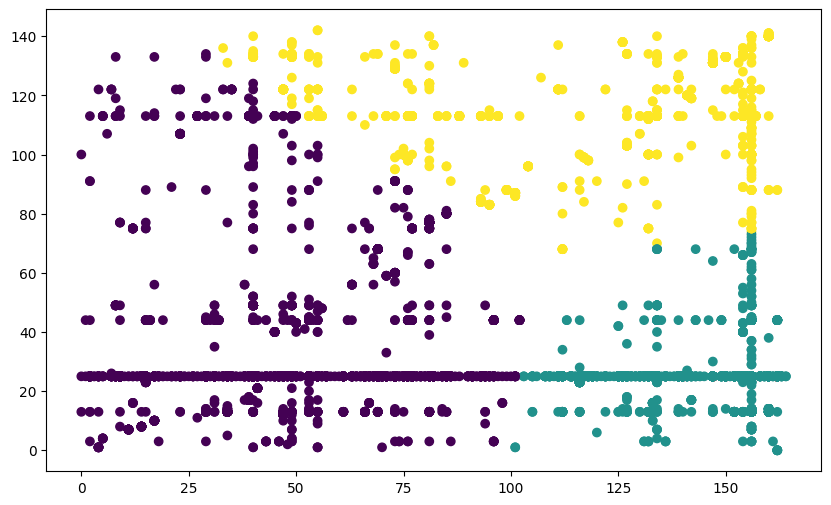

In [439]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Country_Code'], df['Language_Count'], c=df['Cluster'])

plt.show()